# Actividad complementaria prueba 1

## Nombre completo integrantes:
### -Enzo Marín
### -Franco Bocca


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from scipy import fftpack
from style import *

from ipywidgets import interact, FloatSlider, IntSlider, SelectionSlider, Layout
from functools import partial

slider_layout = Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
SelectionSlider_nice = partial(SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)

Cannot find path /home/gma950/.jupyter/nbconfig/, rise configuration wasn't set


### 2) sea una señal continua x(t)= sin(2*pi *f0 *t) cuyo espectro
                
                          S(f)=j/2 [δ(f+f0) -δ(f-f0)]
                
    a) Dibuje el espectro.¿Es S(f) limitada en frecuencia? ¿Cuales son sus limites?
    b) Asuma que muestreamos x(t) con una frecuencia de muestreo Fs = 2f0. Dibuje el espectro de la señal
        muestreada entre -2Fs y 2Fs. ¿Es posible recuperar x(t) a partir del espectro discreto?
        
Consideraciones pregunta 2: Asuman dos posibilidades para  $f_{0} = 2$ y $f_{0}=2.22342$ y en cada caso 3 posibilidades para $F_{s} = 1.5*f_{0}, 2*f_{0}, 2.5*f_{0} $, es decir 6 combinaciones y para cada responder si se puede recuperar el espectro original

# Considerando f0 = 2 [hz]

<IPython.core.display.Javascript object>


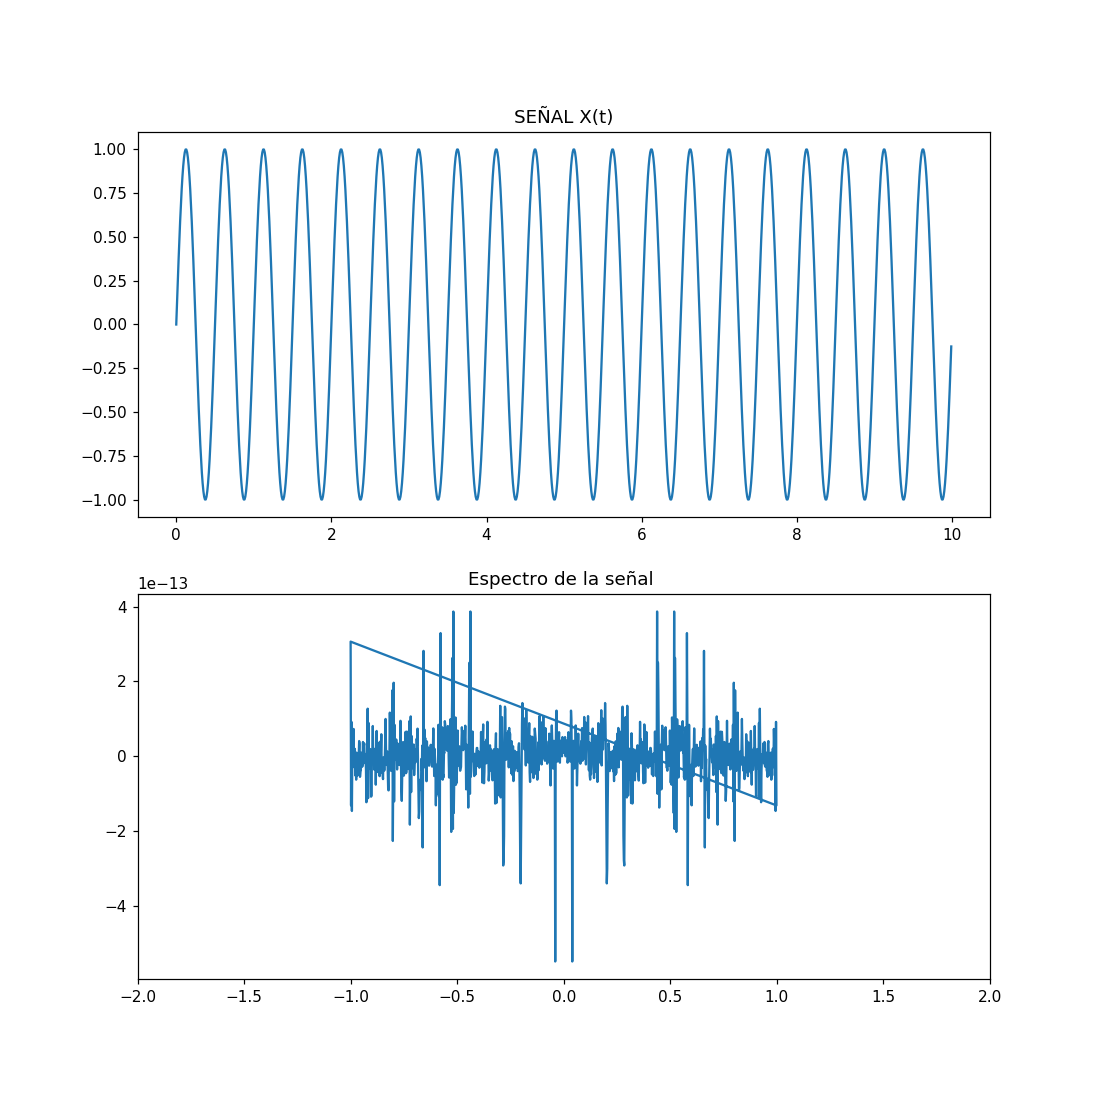

(-2, 2)

In [39]:
f =2.0
t = np.arange(0.0, 10.0, step=0.01)
y = np.sin(2.0 * np.pi *f * t)
señal = y

fig, ax = plt.subplots(2, figsize=(10, 10));
ax[0].plot(t, señal, '-')
ax[0].set_title('SEÑAL X(t)')


#calculo de la transformada de fourier
fourier = fftpack.fft(señal)
n = len(t)
timestep = 1./f
freq = np.fft.fftfreq(n, d=timestep)


ax[1].plot(freq, fourier)
ax[1].set_title('Espectro de la señal ')
ax[1].set_xlim(-2,2)



considerando que muestreamos x(t) con una frecuencia de muestreo $F_{s} = 1.5f_{0} $    ,  $2f_{0} $, $2.5f_{0} $. Dibuje el espectro de la señal muestreada entre $-2F_{s} $ y $ 2F_{s}$. para cada responder si se puede recuperar el espectro original

<IPython.core.display.Javascript object>


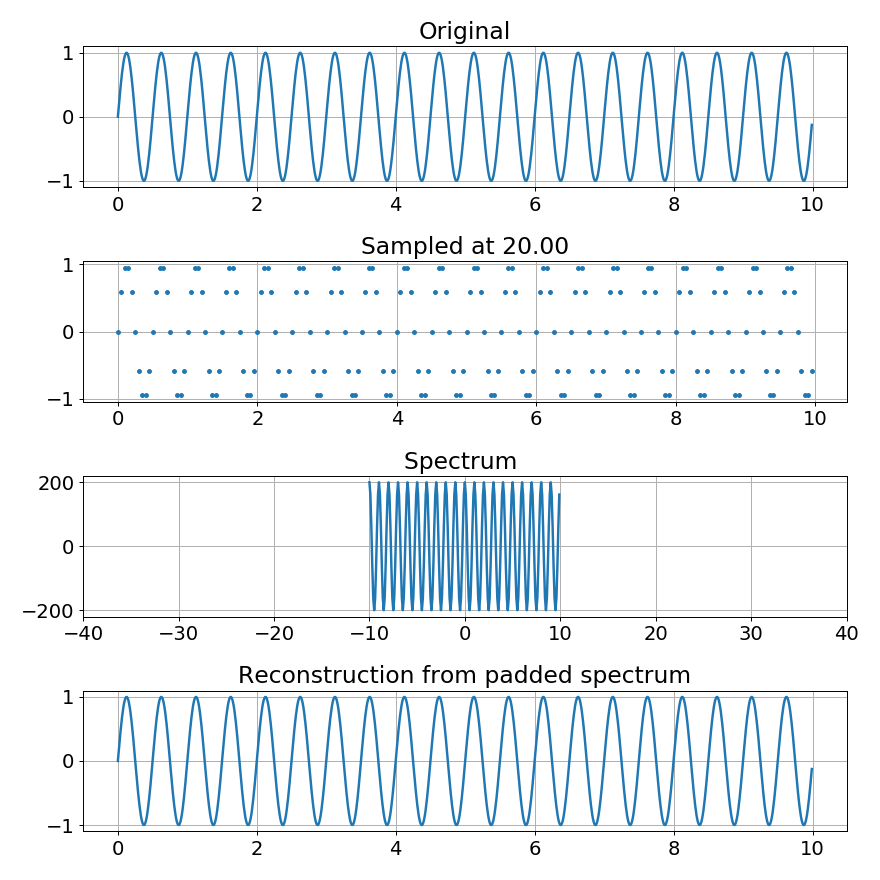

interactive(children=(SelectionSlider(continuous_update=False, description='fs', layout=Layout(height='20px', …

los valores 3, 4 y 5 del slider corresponden a 1.5*f0 , 2*f0 , 2.5*f0 respectivamente, los demás valores
los utilizamos para comprobar el teorema del muestreo


In [24]:
f =2.0
#fs = 1.5* f
t = np.arange(0.0, 10.0, step=0.01)
N = len(t)
y = np.sin(2.0 * np.pi* f * t)
señal = y

fig, ax = plt.subplots(4, figsize=(10, 10));
plt.subplots_adjust(hspace = 0.5)
ax[0].plot(t, y, '-')
ax[0].set_title('Original')






def update(fs):   
    print(fs)
    t_short = t[::int(100/fs)]
    s_short = señal[::int(100/fs)]
    ax[1].cla()
    ax[1].plot(t_short, s_short, '.')
    ax[1].set_title('Sampled at %0.2f' %(fs))

    S = fftpack.fft(s_short);
    f = fftpack.fftshift(fftpack.fftfreq(n=len(S), d=1.0/fs))
    #f = fftpack.fftfreq(n=len(S), d=1.0/fs)

    ax[2].cla(); 
    ax[2].plot(f, fftpack.fft((np.absolute(S))), linewidth=2)
    ax[2].set_xlim([-2*fs, 2*fs])
    S_pad = np.concatenate((S[:int(len(S)/2)], np.zeros(shape=(N-len(S))), S[int(len(S)/2):]))
    ax[2].set_title('Spectrum ');
    s_recon = np.real(fftpack.ifft(S_pad))
    ax[3].cla();
    ax[3].plot(t, s_recon*len(t)/len(t_short), '-', linewidth=2); 
    ax[3].set_title("Reconstruction from padded spectrum");
interact(update, fs=SelectionSlider_nice(options=[3, 4,4.2, 5,10,15,20,30], value=3));

print('los valores 3, 4 y 5 del slider corresponden a 1.5*f0 , 2*f0 , 2.5*f0 respectivamente, los demás valores')
print('los utilizamos para comprobar el teorema del muestreo')





El teorema de muestreo nos dice que:
- Si la $f_s > 2 f_{max}$, donde $f_{max}$ es la componente de frecuencia más alta de la señal, entonces la señal analógica puede ser recuperada a partir de sus muestras discretas

en nuestro caso $f_{max} = f_{0}$ = 2 [hz]

por lo tanto para :

   - $F_{s} = 1.5 * f_{0} = 3 [hz]$ la señal no puede ser reconstruida ya que $3 \ngtr 4 $
   - $F_{s} = 2 * f_{0} = 4 [hz]$ la señal no puede ser reconstruida ya que $4 \ngtr 4 $
   - $F_{s} = 2.5 * f_{0} = 5 [hz]$ la señal si puede ser reconstruida completamente ya que $5 > 4 $





# Considerando $f_{0}= 2.22342$

<IPython.core.display.Javascript object>


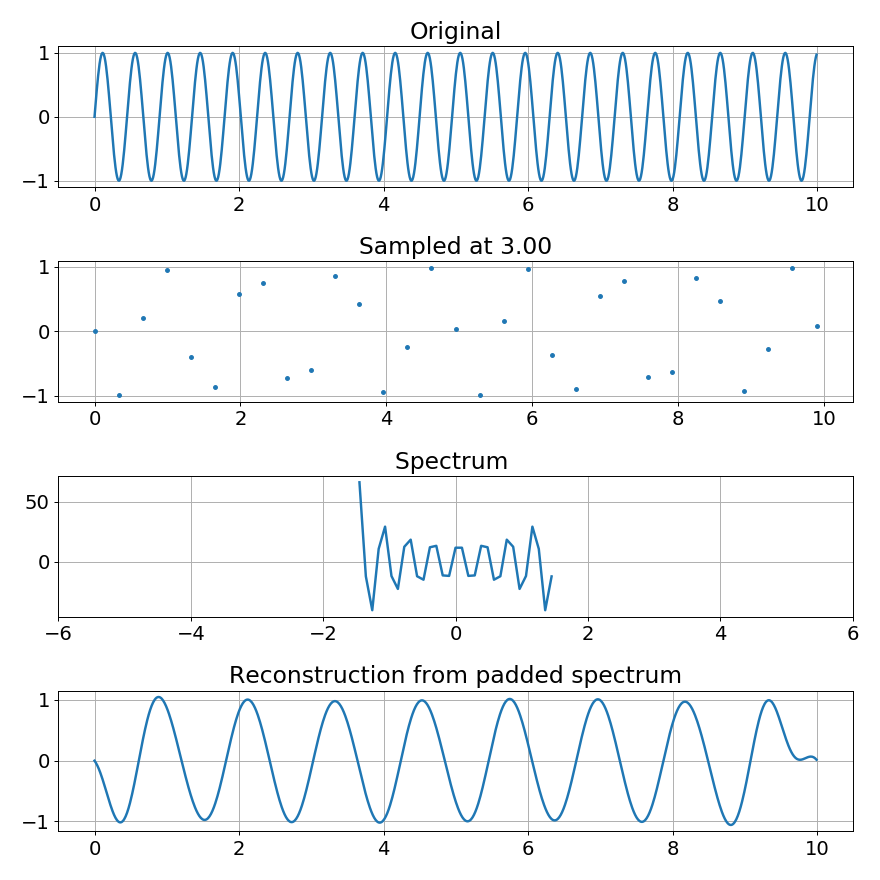

interactive(children=(SelectionSlider(continuous_update=False, description='fs', layout=Layout(height='20px', …

los tres primeros valores del slider corresponden a 1.5*f0 , 2*f0 , 2.5*f0 


In [25]:
f =2.22342
#fs = 1.5* f
t = np.arange(0.0, 10.0, step=0.01)
y = np.sin(2.0 * np.pi* f * t)
señal = y

fig, ax = plt.subplots(4, figsize=(10, 10));
ax[0].plot(t, y, '-')
ax[0].set_title('Original')






def update(fs):   
    print(fs)
    t_short = t[::int(100/fs)]
    s_short = señal[::int(100/fs)]
    ax[1].cla()
    ax[1].plot(t_short, s_short, '.')
    ax[1].set_title('Sampled at %0.2f' %(fs))

    S = fftpack.fft(s_short);
    f = fftpack.fftshift(fftpack.fftfreq(n=len(S), d=1.0/fs))
    #f = fftpack.fftfreq(n=len(S), d=1.0/fs)

    ax[2].cla(); 
    ax[2].plot(f, fftpack.fft((np.absolute(S))), linewidth=2)
    ax[2].set_xlim([-2*fs, 2*fs])
    S_pad = np.concatenate((S[:int(len(S)/2)], np.zeros(shape=(N-len(S))), S[int(len(S)/2):]))
    ax[2].set_title('Spectrum ');
    s_recon = np.real(fftpack.ifft(S_pad))
    ax[3].cla();
    ax[3].plot(t, s_recon*len(t)/len(t_short), '-', linewidth=2); 
    ax[3].set_title("Reconstruction from padded spectrum");
interact(update, fs=SelectionSlider_nice(options=[3, 4, 5,20,30], value=3));

print('los tres primeros valores del slider corresponden a 1.5*f0 , 2*f0 , 2.5*f0 ')

en este caso consideramos $f_{max} = f_{0}$ = 2.22342 [hz]

# 2) Pregunta n°4

Sean las funciones constante
$$
\begin{align}
x[n] &= A
\end{align}
$$
y delta de Kronecker
$$
\begin{align}
\delta[n-m] = \begin{cases} 1 & n=m \\ 0 & n \neq m \end{cases}
\end{align}
$$
Encuentre y grafique la DFT de $x[n]$ y de $A \delta [n-n_0]$. Asuma que $n = 0,1,2, \dots ,N-1$ y que $n_0 \in [0,N-1]$, ¿Qué ocurre cuando $n_0 = 0$?                 
HINT: $ \sum_{n=0}^{N-1} x^n = \frac{1-x^N}{1-x}, x \neq 1 $


Consideraciones pregunta 4: Asuman $A=5, N=10$ y muestre resultados para $n_0=0,1,2,3,4,5$

<IPython.core.display.Javascript object>


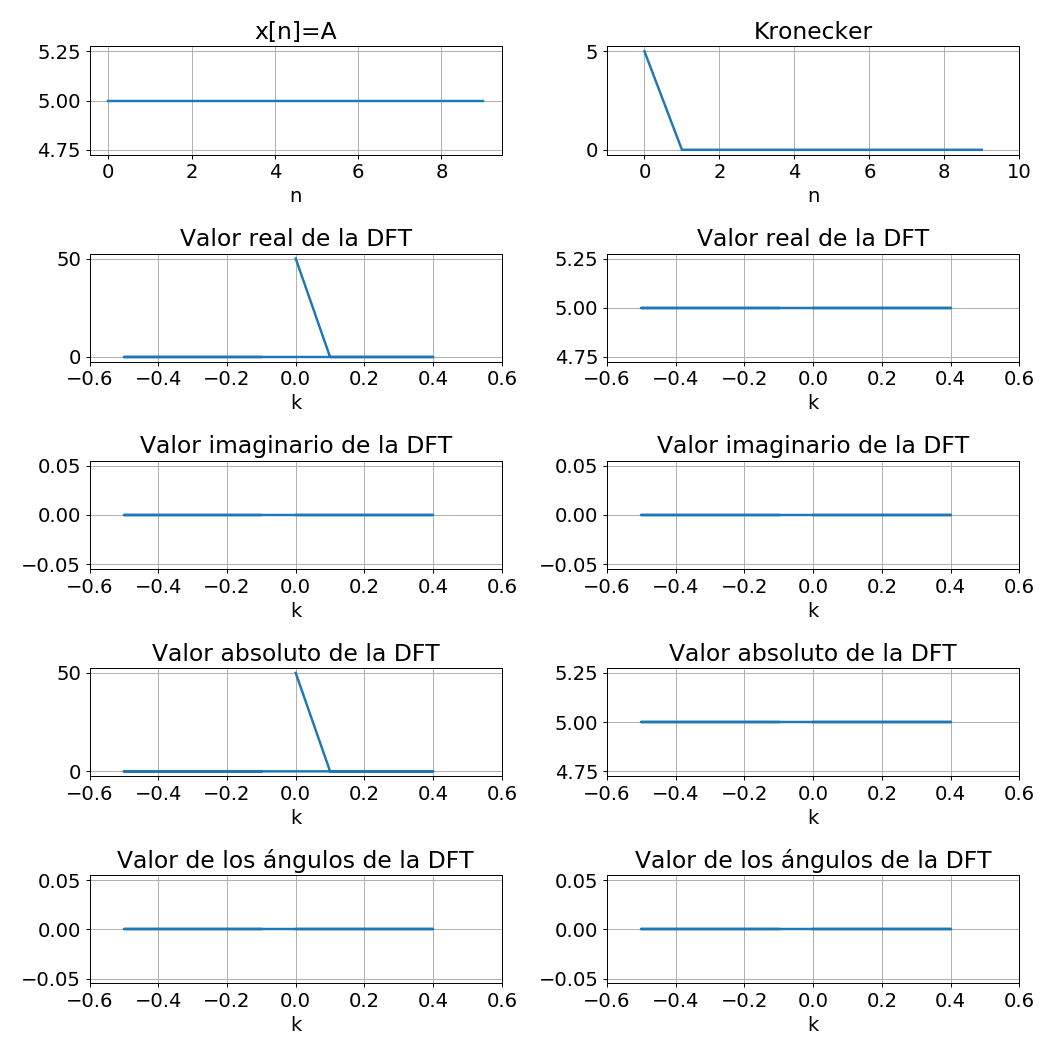

interactive(children=(SelectionSlider(continuous_update=False, description='n_0', layout=Layout(height='20px',…

In [26]:
A = 5
N = 10
n = np.arange(0.0, 10.0, step = 1)

#print(n)

x = n*0 + A

#n_0 = 0 #1 2 3 4 5


def delta(n, m):
    s = np.zeros_like(n)
    for i in range(0, len(n)):
        if n[i]==m:
            s[i]=A
    return s

Akrn = delta(n, n_0)

fig, axes = plt.subplots(5,2,figsize=(12,12)) 

axes[0][0].plot(n,x)
axes[0][0].set_title("x[n]=A")
axes[0][0].set_xlabel('n')
axes[1][0].plot(fftpack.fftfreq(d=1,n=10), np.real(fftpack.fft(x)));
axes[1][0].set_title("Valor real de la DFT")
axes[1][0].set_xlim([-0.6, 0.6])
axes[1][0].set_xlabel('k')
axes[2][0].plot(fftpack.fftfreq(d=1,n=10), np.imag(fftpack.fft(x)));
axes[2][0].set_title("Valor imaginario de la DFT")
axes[2][0].set_xlim([-0.6, 0.6])
axes[2][0].set_xlabel('k')
axes[3][0].plot(fftpack.fftfreq(d=1,n=10), np.abs(fftpack.fft(x)));
axes[3][0].set_title("Valor absoluto de la DFT")
axes[3][0].set_xlim([-0.6, 0.6])
axes[3][0].set_xlabel('k')
axes[4][0].plot(fftpack.fftfreq(d=1,n=10), np.angle(fftpack.fft(x)));
axes[4][0].set_title("Valor de los ángulos de la DFT")
axes[4][0].set_xlim([-0.6, 0.6])
axes[4][0].set_xlabel('k')

def update(n_0): 
    Akrn = delta(n, n_0)
    #print(Akrn)
    axes[0][1].cla()
    axes[0][1].set_title("Kronecker")
    axes[0][1].set_xlabel('n')
    axes[0][1].set_xlim([-1, 10])
    axes[0][1].plot(n,Akrn)
    axes[1][1].cla()
    axes[1][1].set_title("Valor real de la DFT")
    axes[1][1].set_xlim([-0.6, 0.6])
    axes[1][1].set_xlabel('k')
    axes[1][1].plot(fftpack.fftfreq(d=1,n=10), np.real(fftpack.fft(Akrn)))
    axes[2][1].cla()
    axes[2][1].set_title("Valor imaginario de la DFT")
    axes[2][1].set_xlim([-0.6, 0.6])
    axes[2][1].set_xlabel('k')
    axes[2][1].plot(fftpack.fftfreq(d=1,n=10), np.imag(fftpack.fft(Akrn)))
    axes[3][1].cla()
    axes[3][1].set_title("Valor absoluto de la DFT")
    axes[3][1].set_xlim([-0.6, 0.6])
    axes[3][1].set_xlabel('k')
    axes[3][1].plot(fftpack.fftfreq(d=1,n=10), np.abs(fftpack.fft(Akrn)))
    axes[4][1].cla()
    axes[4][1].set_title("Valor de los ángulos de la DFT")
    axes[4][1].set_xlim([-0.6, 0.6])
    axes[4][1].set_xlabel('k')
    axes[4][1].plot(fftpack.fftfreq(d=1,n=10), np.angle(fftpack.fft(Akrn)))

interact(update, n_0=SelectionSlider_nice(options=[0,1, 2, 3, 4, 5]));
